In [1]:
import numpy as np
import missingno as mn
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
# data = pd.read_csv('./Data/Training_dataset_Small.csv')
data = pd.read_csv('./Data/Training_dataset_Original.csv', low_memory=False)

In [3]:
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [5]:
data = data.replace("nan", np.nan)
data = data.replace("missing", np.nan)
data = data.replace("na", np.nan)

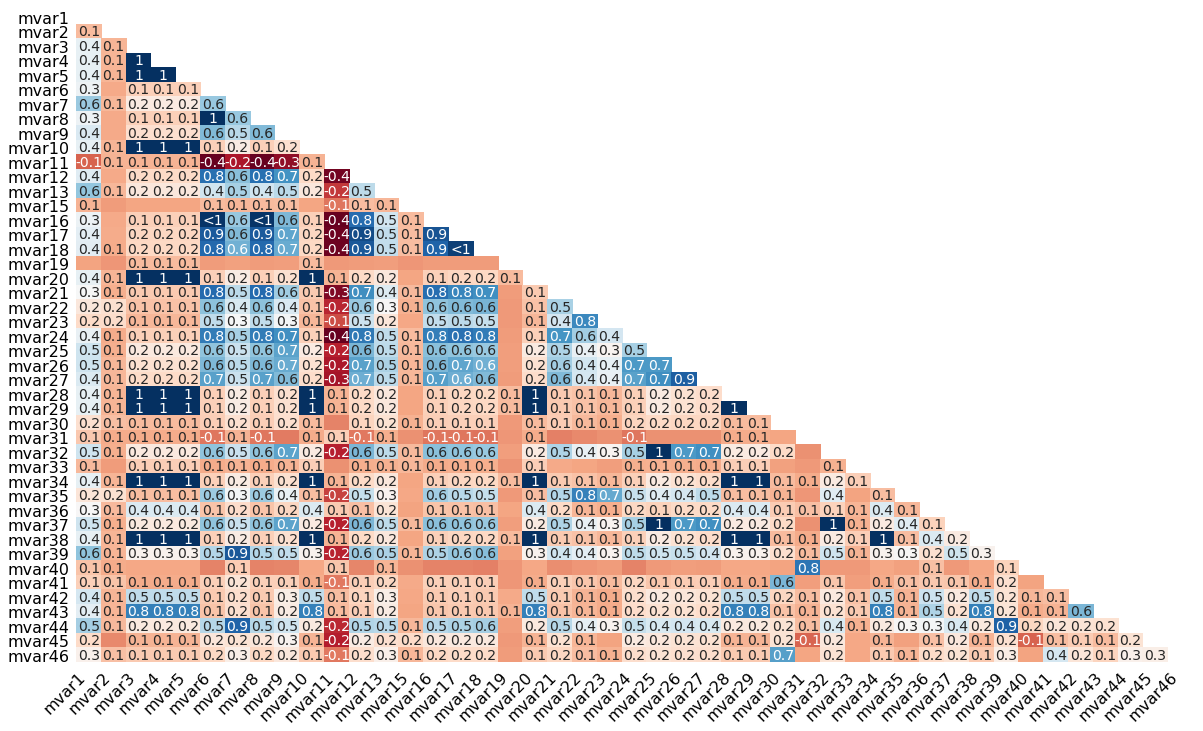

In [6]:
mn.heatmap(data)

In [7]:
# np.set_printoptions(threshold=np.inf)
data.describe(include='all')

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
count,80000.000000,76361,74447.000000,79499.000000,79499.000000,79499.00000,61036,72606,61036,68592,...,73960,17443,25422,78099,79182,72255.000000,35145,57211,80000,80000.000000
unique,NaN,454,NaN,NaN,NaN,NaN,7117,28564,15704,29578,...,15,13623,19477,1084,59,NaN,6,8,2,NaN
top,NaN,1736,NaN,NaN,NaN,NaN,0,0,0,297,...,0,100,100,0,0,NaN,0,0,C,NaN
freq,NaN,477,NaN,NaN,NaN,NaN,10707,2988,2631,1208,...,68827,2291,698,24305,9973,NaN,32905,52381,51840,NaN
mean,270031.500000,NaN,1.105629,5.280955,0.474516,1.12472,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.705285,NaN,NaN,NaN,0.246213
std,23094.155105,NaN,1.645299,10.815463,1.796261,5.99545,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.245879,NaN,NaN,NaN,0.430806
min,230032.000000,NaN,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.060660,NaN,NaN,NaN,0.000000
25%,250031.750000,NaN,0.140100,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.515220,NaN,NaN,NaN,0.000000
50%,270031.500000,NaN,0.538900,0.300000,0.000000,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.737030,NaN,NaN,NaN,0.000000
75%,290031.250000,NaN,1.445050,6.447000,0.000000,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.943475,NaN,NaN,NaN,0.000000


In [8]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [9]:
(draw_missing_data_table(data))[:12]

,Total,Percent
mvar40,62557,0.781963
mvar31,56218,0.702725
mvar41,54578,0.682225
mvar45,44855,0.560688
mvar11,44819,0.560238
mvar23,40248,0.503100
mvar30,36417,0.455213
mvar35,33014,0.412675
mvar15,32067,0.400838
mvar22,29124,0.364050


In [12]:
def refine(data):
    data.drop('mvar40', axis=1, inplace=True)
    data.drop('mvar31', axis=1, inplace=True)
    data.drop('mvar41', axis=1, inplace=True)
    data.drop('mvar11', axis=1, inplace=True)
    data.drop('mvar23', axis=1, inplace=True)
    data.drop('mvar45', axis=1, inplace=True)
    data.drop('mvar30', axis=1, inplace=True)
    data.drop('mvar35', axis=1, inplace=True)
    data.drop('mvar15', axis=1, inplace=True)
    data.drop('mvar22', axis=1, inplace=True)
    return data

In [13]:
def preprocess(data):
    data = refine(data)
#     mn.dendrogram(data)
#     mn.heatmap(data)
#     mn.bar(data)
#     mn.matrix(data)
    # data.mean(skipna = True)
    # data['mvar1'].mean(skipna = True)
    # data.median()
    data = data.fillna(data.median())
    data['mvar47'] = data['mvar47'] == 'C'
#     data['mvar47'].head()
    return data

In [14]:
data = preprocess(data)

In [15]:
X = data[data.loc[:, data.columns != 'default_ind'].columns]
Y = data['default_ind']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64000, 38)
(16000, 38)
(64000,)
(16000,)


In [17]:
print(X_train.head())

       application_key mvar1   mvar2  mvar3  mvar4  mvar5 mvar6  mvar7  mvar8  \
72812           302844  1683  0.1734  9.594    0.0    0.0   295  23253    295   
20652           250684  1646  1.6297  8.687    0.0    0.0     0     53     53   
17356           247388  1892  0.1234  0.000    0.0    0.0  4955  18777  18777   
56329           286361  1713  0.1294  0.000    0.0    0.0   297    383   2478   
12257           242289  1861  0.6801  0.000    0.0    0.0  1774   2167   2167   

       mvar9   ...   mvar34 mvar36 mvar37  mvar38 mvar39 mvar42 mvar43  \
72812   9088   ...        0      8      4       2      0    0.5      3   
20652   9708   ...        0     15      0       7      0   0.25     14   
17356  57490   ...        0      2      2       3      0      0      3   
56329  14171   ...        0      1      3       1      0    0.2      1   
12257   2478   ...        0      1      0       1      0      0      2   

        mvar44 mvar46  mvar47  
72812  0.54001      0   False  
2065

In [14]:
lr = LogisticRegression(solver='warn', max_iter = 100)
lr.fit(X_train, Y_train)
print("Done")

/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done


In [15]:
scores = cross_val_score(lr, X_train, Y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarnin

CV accuracy: 0.772 +/- 0.004


In [16]:
scores = cross_val_score(lr, X_test, Y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

CV accuracy: 0.766 +/- 0.007


/home/epsilon/.virtualenvs/DATA/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [270]:
# np.set_printoptions(threshold=np.inf)

In [397]:
# type(predict)
# X_test.head()

In [17]:
lb = pd.read_csv('./Data/Leaderboard_dataset.csv', low_memory=False)

In [18]:
lb = lb.replace("nan", np.nan)
lb = lb.replace("missing", np.nan)
lb = lb.replace("na", np.nan)

In [19]:
print(lb.shape)

(25000, 48)


In [20]:
lb = preprocess(lb)
predict = lr.predict(lb)

In [21]:
predict = pd.DataFrame(predict)
# print(predict.head())
print(predict.shape)

(25000, 1)


In [22]:
np.set_printoptions(threshold=np.inf)
print(predict)

       0
0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     1
24     1
25     0
26     0
27     0
28     1
29     0
...   ..
24970  1
24971  0
24972  1
24973  1
24974  1
24975  0
24976  0
24977  0
24978  1
24979  1
24980  0
24981  1
24982  1
24983  0
24984  0
24985  0
24986  1
24987  1
24988  1
24989  1
24990  1
24991  0
24992  1
24993  1
24994  0
24995  0
24996  0
24997  1
24998  0
24999  0

[25000 rows x 1 columns]


In [23]:
key = pd.DataFrame(lb['application_key'])
# key = key.values
print(key.shape)

(25000, 1)


In [24]:
pred = pd.DataFrame()
pred['application_key'] = lb['application_key']
pred['default_ind'] = predict
print(pred.head())

   application_key  default_ind
0           350053            0
1           350054            0
2           350055            0
3           350056            1
4           350057            0


In [25]:
pred.to_csv("Analyzing_IITGuwahati_1.csv")